# Observation of diffraction effect 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E
\end{equation}

We use spectral method to solve this equation numerically, so in order to verify the numerical solution, we compare the solution with analytic solution :



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


#Import parameters from python
parameter = np.loadtxt("../results/parameter_linear.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]

#Numerical solution
inten_num = np.loadtxt("../results/intensity_linear.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

energy = np.loadtxt("../results/energy_linear.txt")


#spacial discretization along x and y, need to be the same as production codes
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

In [2]:
print('Information about the experiment:')
print('Initial condition: ')
print('Wave number: ',np.round(k,2))
print('Multiphoton constant: ',K)
print('Spot size: ',w0)
print('Normalised Pcr: ',Pcr)
print('Pin/Pcr: ',p)
print('Box parameters:')
print('Length of box: ',L)
print('Number of point in x and y: ',2*N)
print('Length of evolution: ',Lz)
print('Number of point z: ',Nz)

Information about the experiment:
Initial condition: 
Wave number:  8107335.88
Multiphoton constant:  7.0
Spot size:  0.0007
Normalised Pcr:  1.7e-07
Pin/Pcr:  4.0
Box parameters:
Length of box:  0.0015999999999999999
Number of point in x and y:  128
Length of evolution:  3.0
Number of point z:  9000


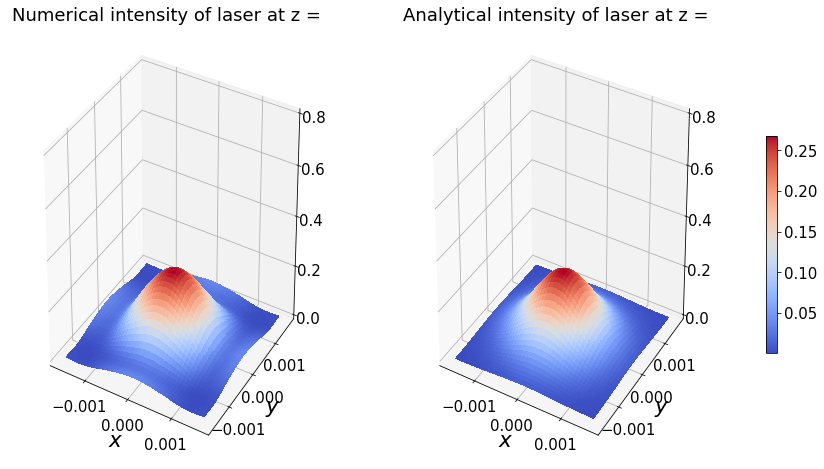

In [8]:
#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Analytic solution
Pin = p*Pcr
E0 = (2*Pin/(np.pi*w0**2))**(1/2)
w = lambda z : w0*(1 + (2*z/(k*w0**2))**2)**(1/2)
square = np.vectorize(lambda x,y : x**2+y**2 )
xy2 = square(x,y)
inten_analy = lambda z : (E0*w0/w(z)*np.exp(-xy2/w(z)**2))**2


#Plot 3D comparison between numerical and analytical solution at arbitary z
#Since we only save 30 photos, z cannot be 
axes = []
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(121,projection='3d')
ax.title.set_text('Numerical intensity of laser at z = ')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_num[-1],cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax = fig.add_subplot(122,projection='3d')
ax.title.set_text('Analytical intensity of laser at z = ')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_analy(Lz),cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=axes,shrink=0.5, aspect=20)

plt.show()

# save figure as pdf
#plt.savefig("../figures/observables.pdf")

In [ ]:
z_interested = np.array([0, 1, 2, 2.99])
pos_interested = z_interested*Nz/(nb_save*Lz)
pos_interested = pos_interested.astype(int)

fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')

for i in range(len(z_interested)):
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]]+1.5*i,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
    axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(0, 4 )
ax.view_init(10, -60)
plt.show()


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


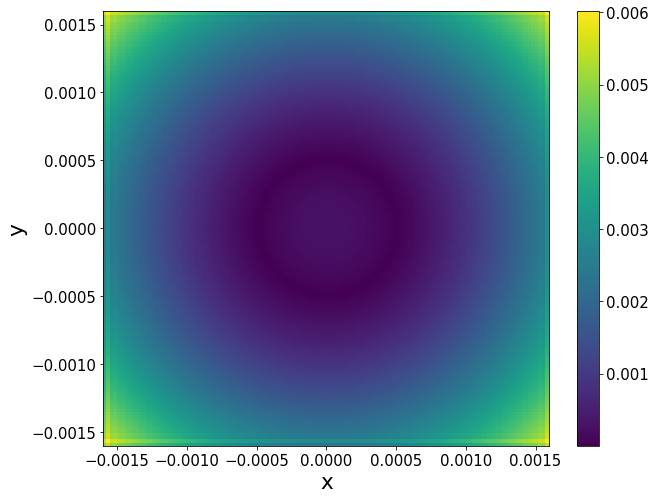

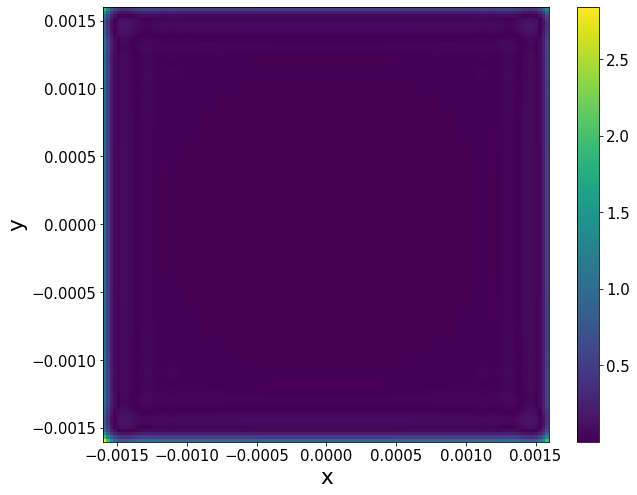

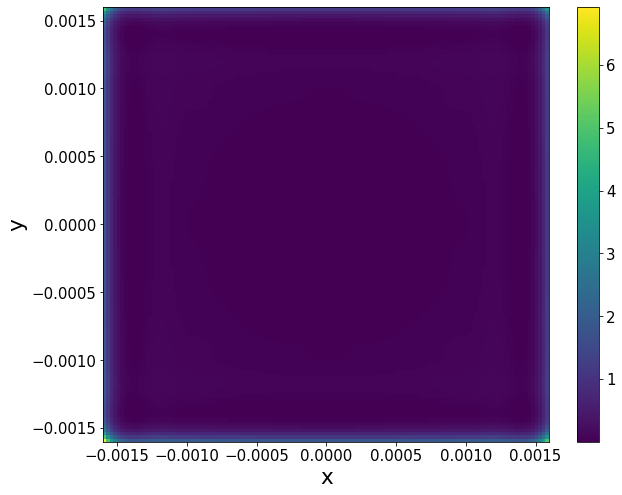

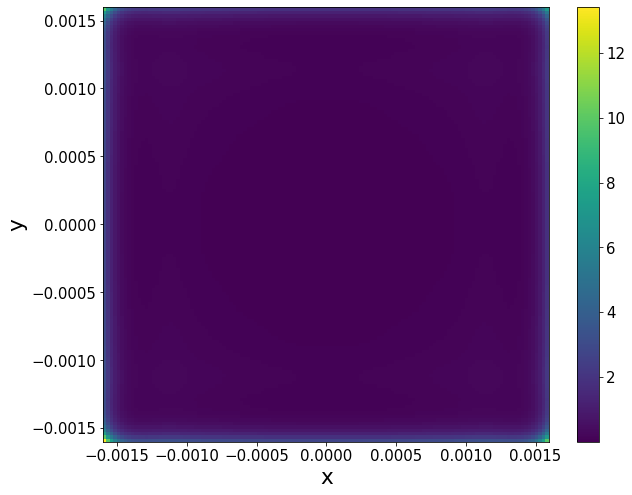

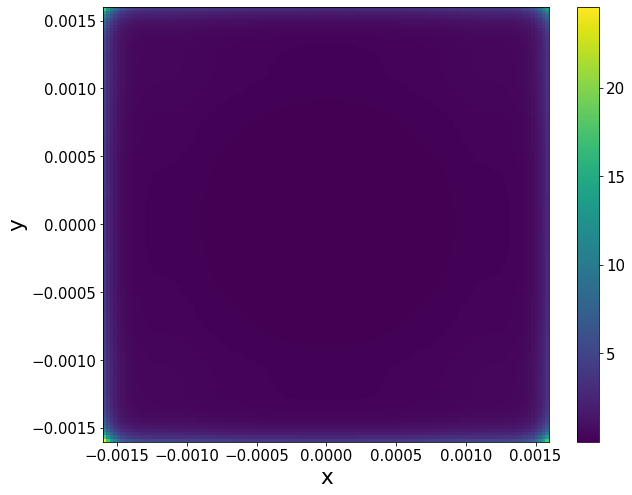

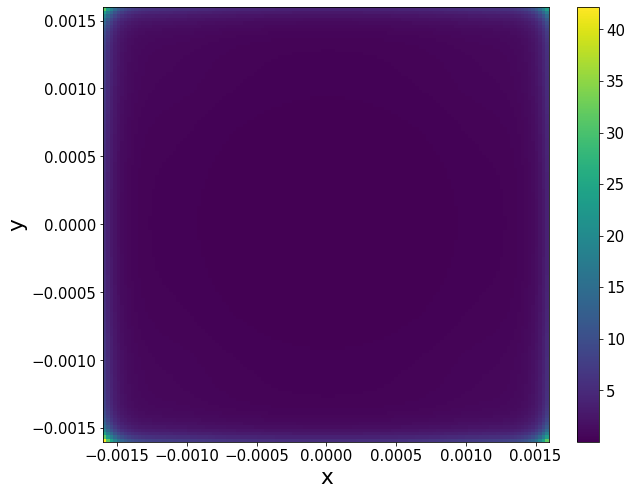

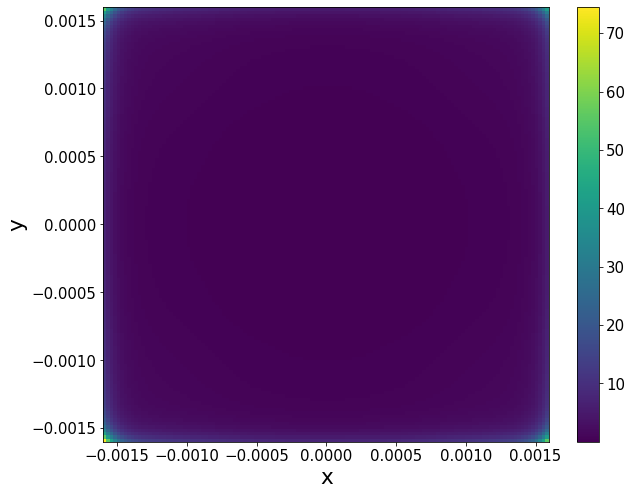

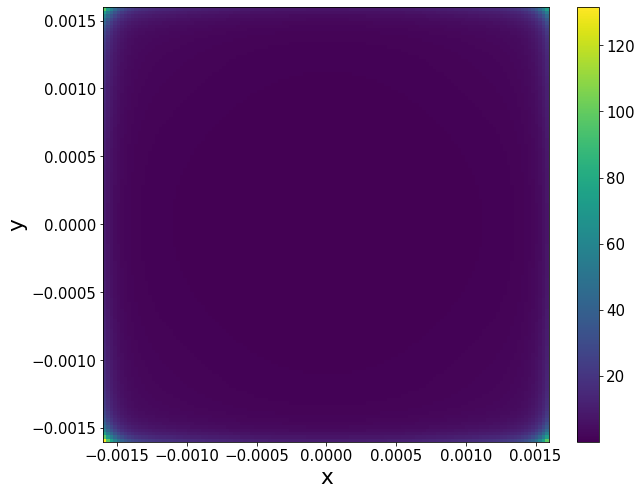

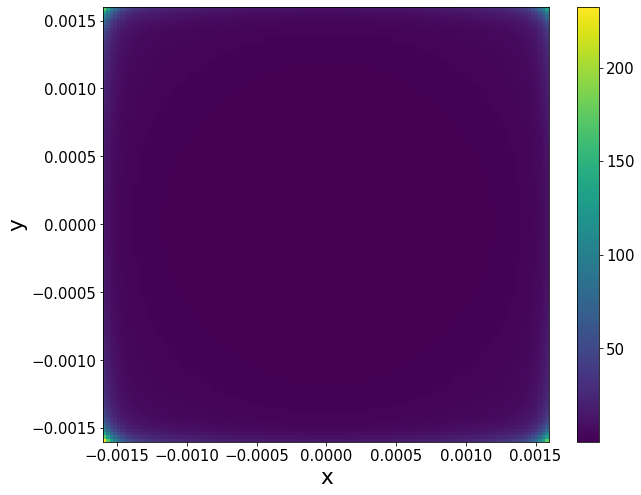

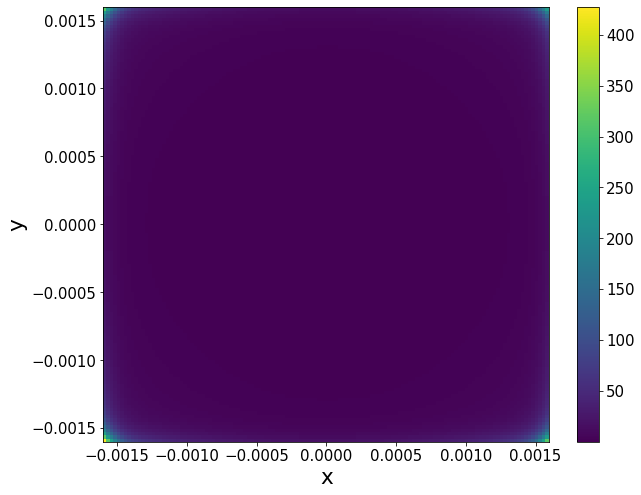

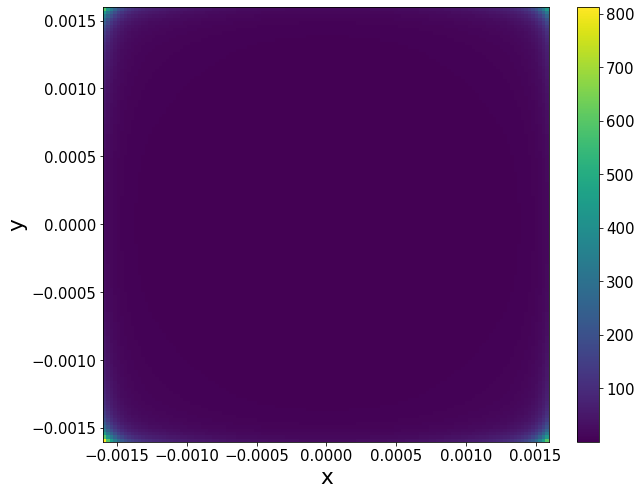

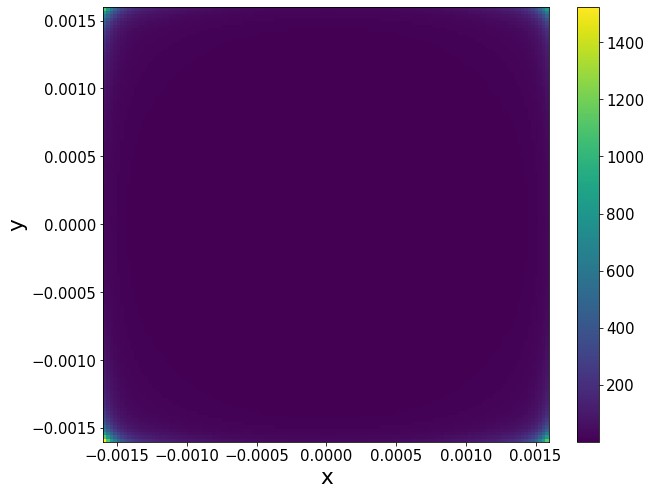

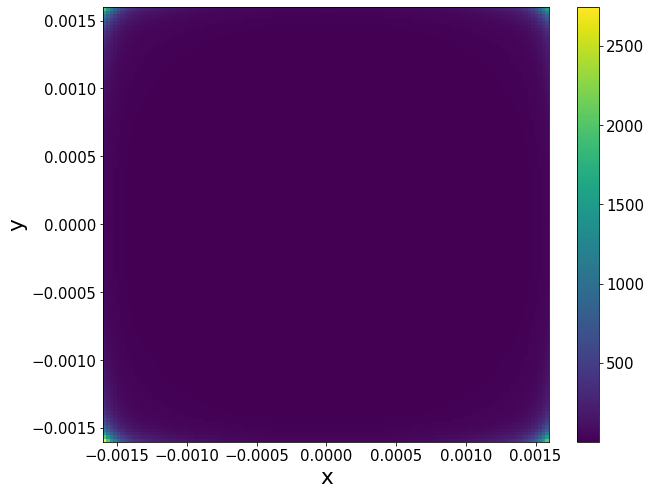

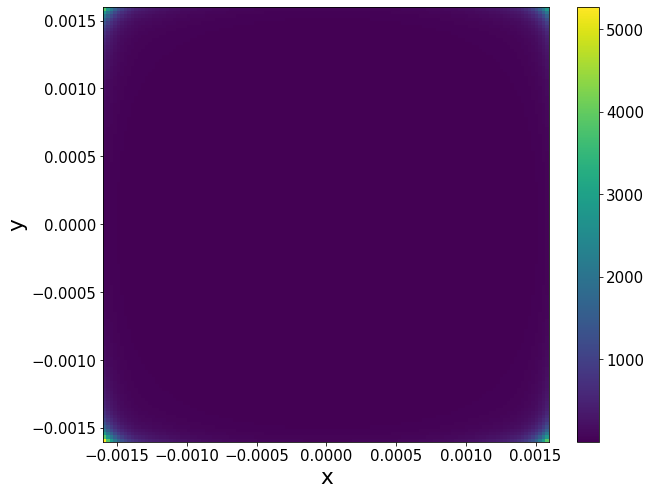

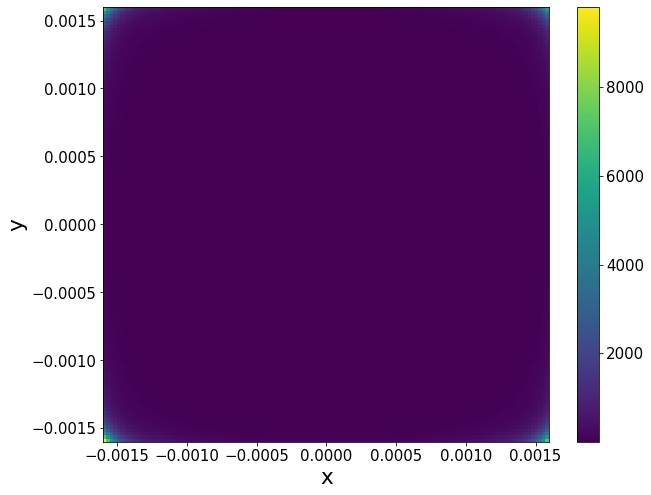

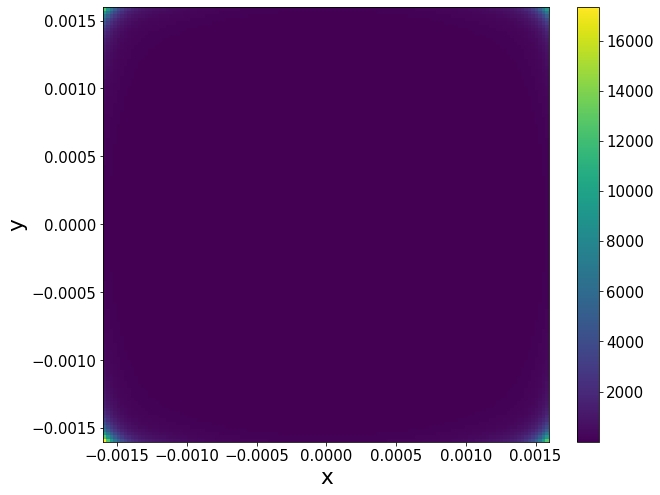

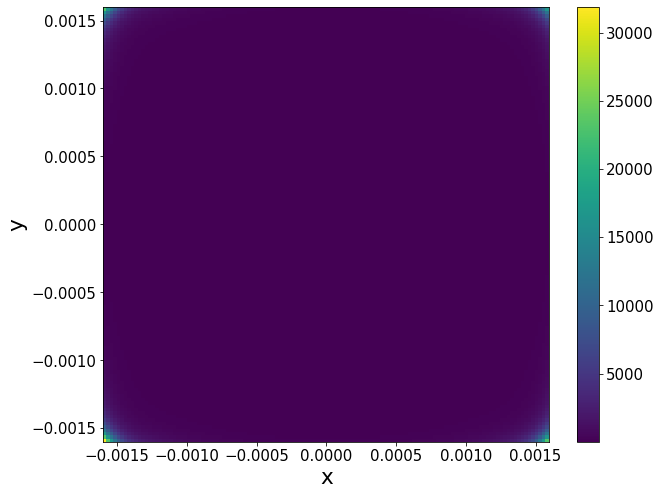

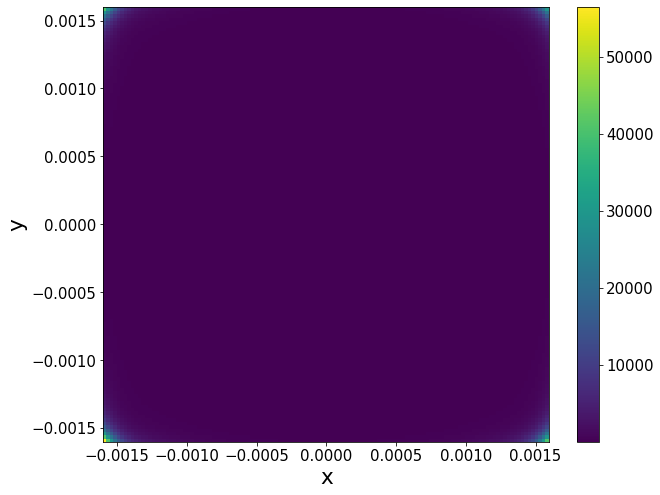

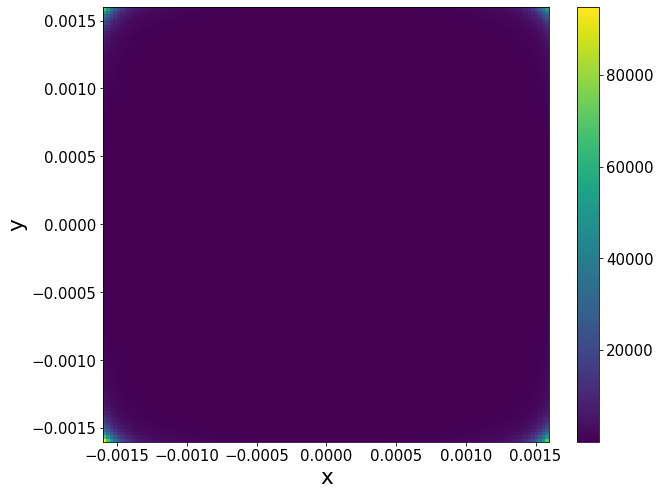

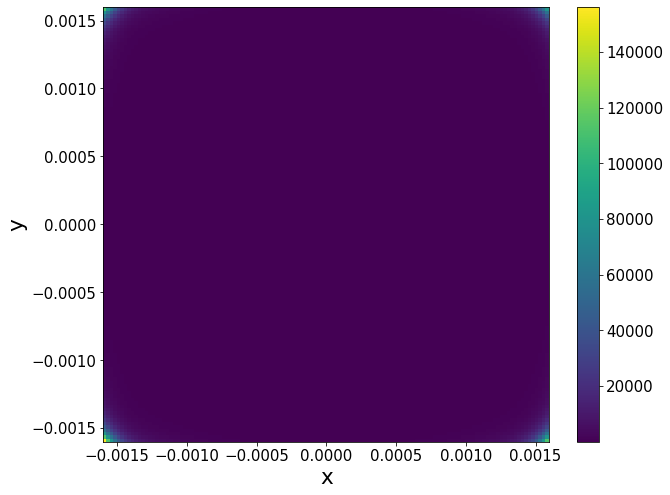

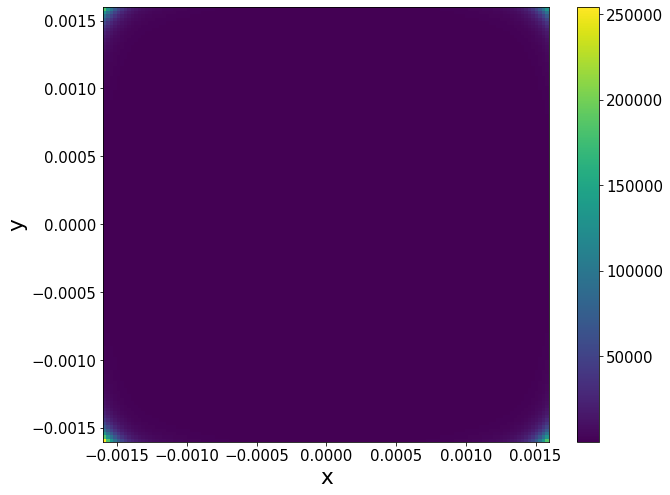

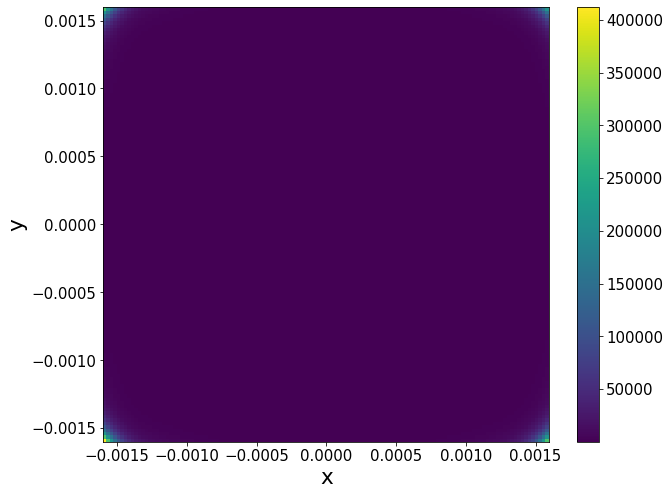

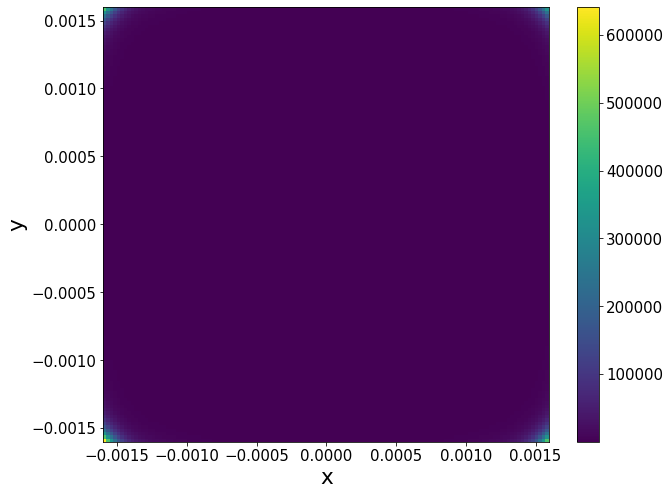

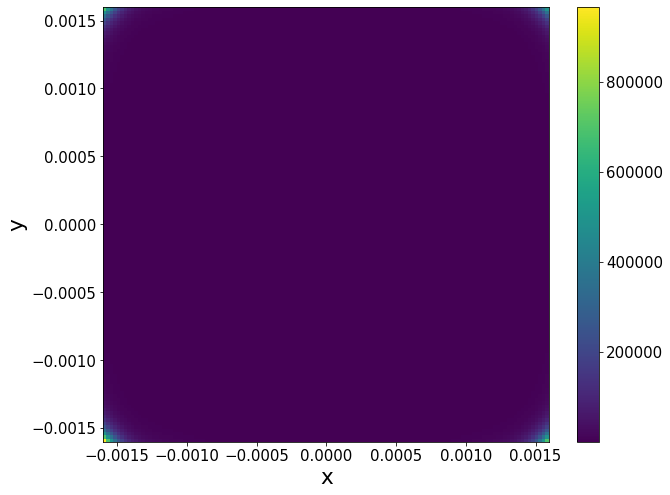

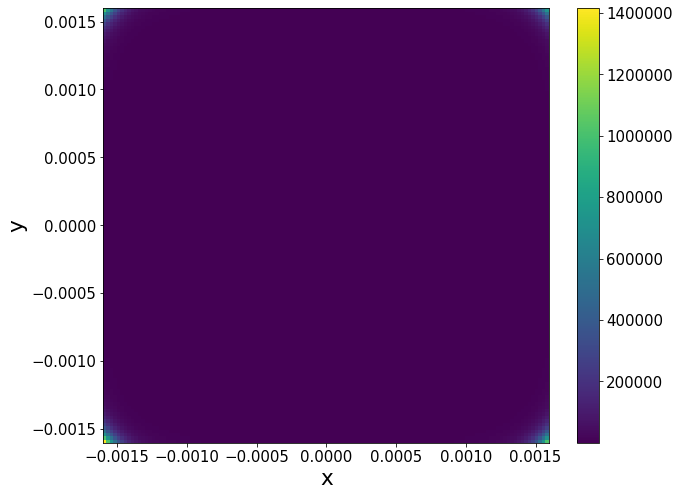

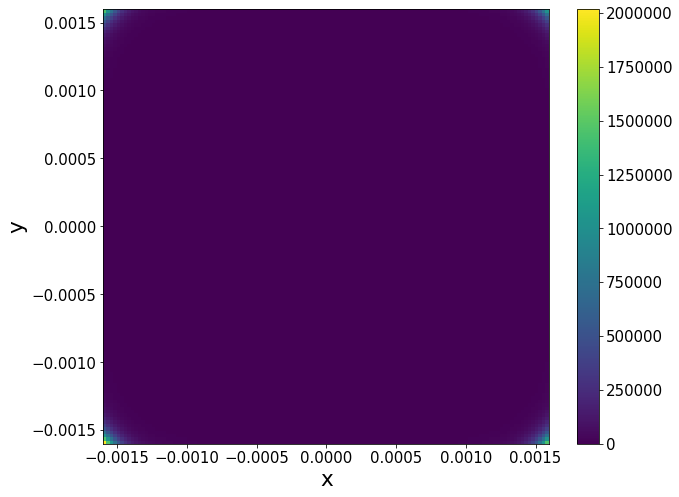

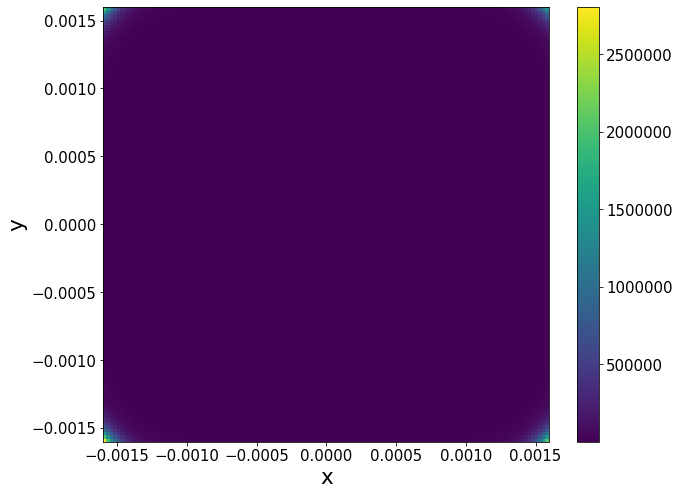

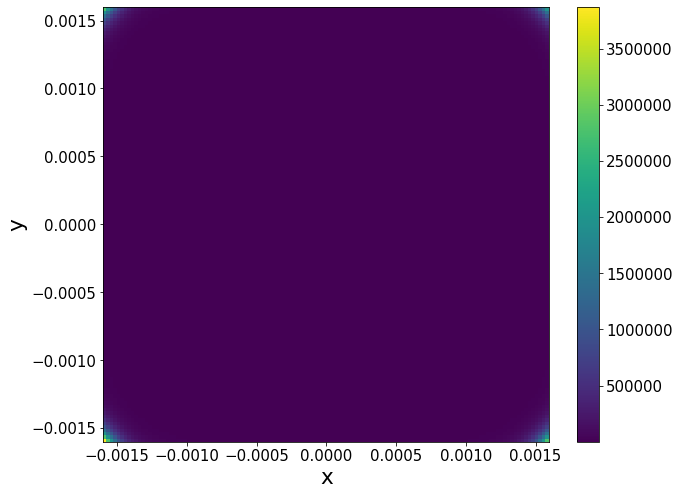

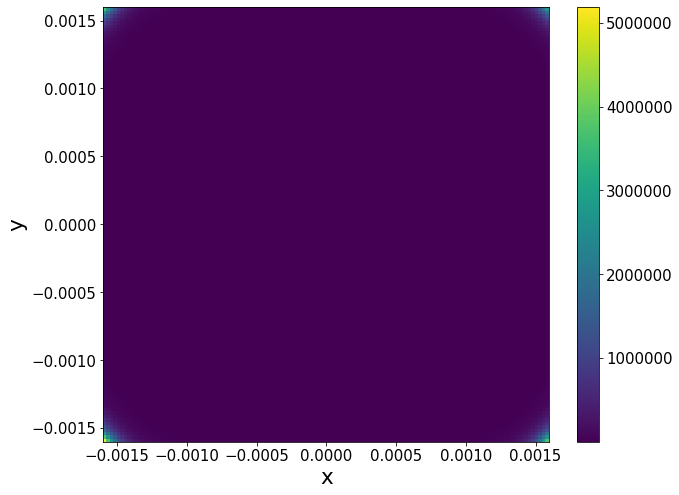

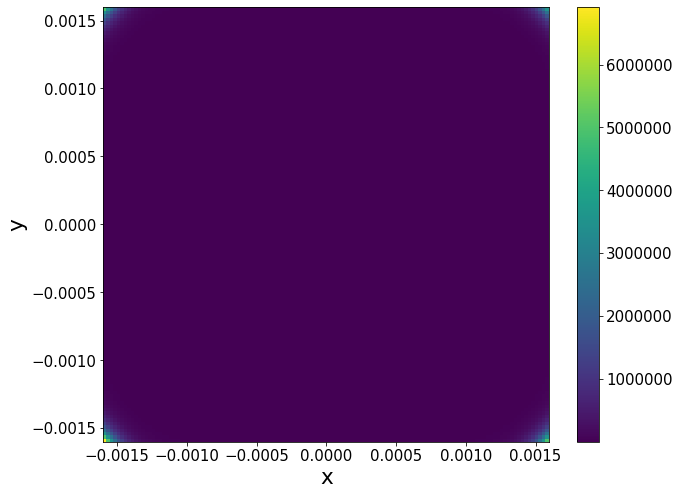

In [11]:
z_interested = np.array([0, 1, 2, 2.99])
pos_interested = z_interested*Nz/(nb_save*Lz)
pos_interested = pos_interested.astype(int)

fig, ax = plt.subplots()
    mesh = ax.pcolormesh(x, y, np.abs((inten_num[i] - inten_analy(z))/inten_analy(z)))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    #plt.xlim(-0.1*L,0.1*L)
    #plt.ylim(-0.1*L,0.1*L)
    fig.show()
    # save figure as pdf
    

## Propagation 

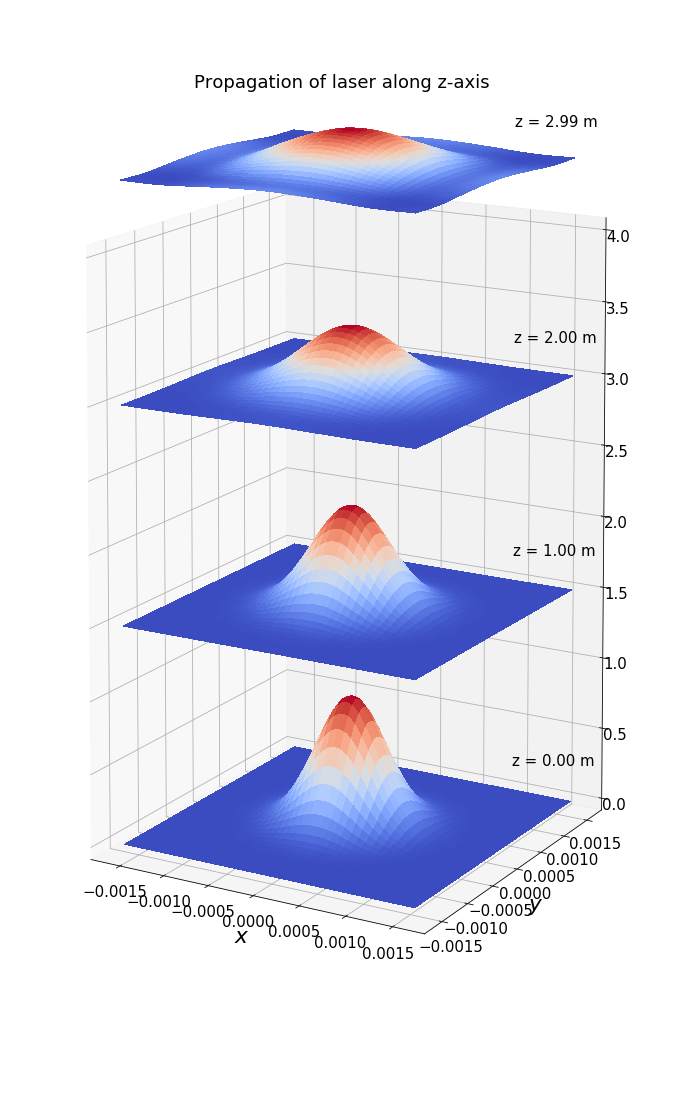

In [19]:
z_interested = np.array([0, 1, 2, 2.99])
pos_interested = z_interested*Nz/(nb_save*Lz)
pos_interested = pos_interested.astype(int)

fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')

for i in range(len(z_interested)):
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]]+1.5*i,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
    axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(0, 4 )
ax.view_init(10, -60)
plt.show()


## Observe the conservation of energy of the laser and the variation of intensity along z-axis

In the propagation, energy must be conserved and the maximum intensity must follow the equation below:
\begin{equation}
\frac{\left|E(z)_{max}\right|^2}{\left|E(0)_{max}\right|^2} = \left(\frac{w_0}{w(z)}\right)^2
\end{equation}

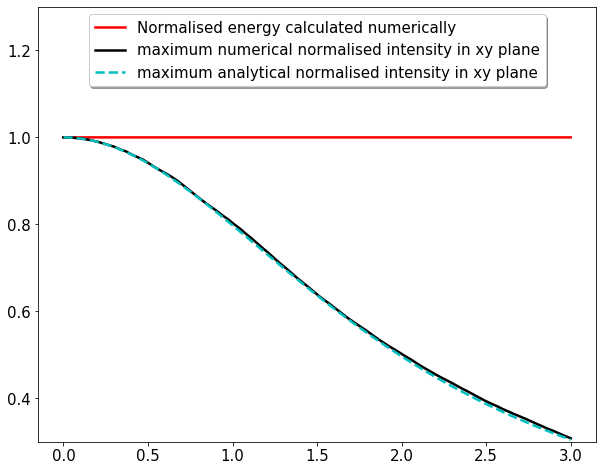

In [18]:
z = np.linspace(0, Lz, inten_num.shape[0])
z_e = np.linspace(0, Lz, energy.shape[0])
Inten_max = []
for inten in inten_num:
    Inten_max.append(np.max(inten))
Energ = energy
Inten_max = np.asarray(Inten_max)

pos = z*Nz/(Lz*nb_save)
pos = pos.astype(int)

plt.plot(z_e, Energ/Energ[0], 'r', label='Normalised energy calculated numerically')
plt.plot(z, Inten_max/Inten_max[0], 'k', label='maximum numerical normalised intensity in xy plane')
#the intensity is maximum at x=y=0
plt.plot(z, (w0/w(z))**2, 'c--', label='maximum analytical normalised intensity in xy plane')

plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.ylim(0.3,1.3)

plt.show()
#plt.savefig("../figures/observables.pdf")
